# Приоритезация гипотез и анализ результатов А/В-тестирования интернет-магазина

Данное исследование состоит из двух частей:

- В первой части с помощью разных методов приоритезации гипотез мы выделим гипотезы, наиболее интересные для анализа.
- Во второй части мы проанализируем полученные ранее результаты А/В-теста и сделаем выводы о том, стоит ли продолжить тест или завершить его.

Цели проекта: 
1. Выделить гипотезы с наибольшей отдачей для бизнеса.
2. Принять решение о продолжении или остановке А/В-тестирования. В случае остановки, определить, было ли исследуемое изменение эффективным.

В первой части исследования мы работаем с девятью гипотезами, которым присвоены различные баллы по показателям охват пользователей, влияние на пользователей,уверенность в гипотезе и затраты ресурсов на проверку гипотезы.

Во второй части мы работаем с двумя датафреймами. Первый - с данными о заказах, второй - с данными о пользователях интернет-магазина. 

План работы:
1. Приоритезация гипотез
- Методом ICE
- Методом RICE
- Сравнение методов и выводы.
2. Анализ результатов А/В-тестирования
- Изучим данные о среднем чеке и количестве заказов в группах А и В
- Рассчитаем относительный прирост группы В
- Посчитаем различия в данных групп А и В и изучим статистическую значимость этих различий
- Выявим аномальных покупателей и изучим данные без них
- Посчитаем различия в данных групп А и В и изучим статистическую значимость этих различий для "очищенных" данных
- Сделаем выводы о результатах тестирования и примем решение о продолжении или остановке.

In [1]:
import pandas as pd
import scipy.stats as stats
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt

## Приоритизация гипотез

In [2]:
pd.options.display.max_colwidth = 130
hypothesis = pd.read_csv('/datasets/hypothesis.csv')
hypothesis

Hypothesis  \
0            Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей   
1                                     Запустить собственную службу доставки, что сократит срок доставки заказов   
2  Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа   
3           Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар   
4                              Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей   
5                      Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов   
6          Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию   
7              Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок   
8                                                       Запустить акцию, дающую скидку на товар в день рождения   

   Reach  Impact  Confidence  Efforts  
0      3      10           8        6  
1      2       5           4       10  
2      8       3           7        3  
3      8       3           3        8  
4      3       1           1        1  
5      3       2           2        3  
6      5       3           8        3  
7     10       7           8        5  
8      1       9           9        5

In [3]:
#сделаем названия полей строчными буквами для удобства работы
hypothesis.columns = hypothesis.columns.str.lower()

### Приоритезация методом ICE

In [4]:
hypothesis['ice'] = round((hypothesis['impact']*hypothesis['confidence'])/hypothesis['efforts'], 2)
hypothesis.sort_values(by='ice', ascending=False)

hypothesis  \
8                                                       Запустить акцию, дающую скидку на товар в день рождения   
0            Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей   
7              Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок   
6          Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию   
2  Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа   
1                                     Запустить собственную службу доставки, что сократит срок доставки заказов   
5                      Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов   
3           Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар   
4                              Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей   

   reach  impact  confidence  efforts    ice  
8      1       9           9        5  16.20  
0      3      10           8        6  13.33  
7     10       7           8        5  11.20  
6      5       3           8        3   8.00  
2      8       3           7        3   7.00  
1      2       5           4       10   2.00  
5      3       2           2        3   1.33  
3      8       3           3        8   1.12  
4      3       1           1        1   1.00

Наиболее привлекательными выглядят три гипотезы: запустить акцию, добавить каналы привлечения и добавить форму подписки. Эти гипотезы выигрывают перед остальными засчет высоких показателей impact и confidence и относительно небольшого показателя efforts. То есть проверка этих гипотез при относительно небольших затраченных усилиях, может принести заметный результат.

Другие же гипотезы имеют меньшее оценочное влияние, а некоторые - большой показатель требуемых усилий.

### Приоритезация методом RICE

In [5]:
hypothesis['rice'] = round((hypothesis['reach']*hypothesis['impact']*hypothesis['confidence'])/hypothesis['efforts'], 2)
hypothesis.sort_values(by='rice', ascending=False)

hypothesis  \
7              Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок   
2  Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа   
0            Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей   
6          Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию   
8                                                       Запустить акцию, дающую скидку на товар в день рождения   
3           Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар   
1                                     Запустить собственную службу доставки, что сократит срок доставки заказов   
5                      Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов   
4                              Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей   

   reach  impact  confidence  efforts    ice   rice  
7     10       7           8        5  11.20  112.0  
2      8       3           7        3   7.00   56.0  
0      3      10           8        6  13.33   40.0  
6      5       3           8        3   8.00   40.0  
8      1       9           9        5  16.20   16.2  
3      8       3           3        8   1.12    9.0  
1      2       5           4       10   2.00    4.0  
5      3       2           2        3   1.33    4.0  
4      3       1           1        1   1.00    3.0

На первом месте теперь - добавление форма подписки. Причём с большим отрывом. Всё благодаря тому, что показатель охвата у этой гипотезы самый высокий из возможных. Это значит, что изменение, предусмотренное этой гипотезой, повлияет на всех пользователей. Это делает гипотезу более привлекательной. 

С большим отрывом на втором месте - гипотеза о добавлении блоков рекомендаций. Высокая позиция у этой гипотезы засчёт большого охвата, высокий уровень увернности в том, что оказанный эффект изменений будет таким, каким мы предполагаем, и низким уровнем требуемых усилий. Однакого влияние оценено всего на три балла. Поэтому разрыв между первым и вторым местом такой большой.

На третьем месте - две гипотезы: новые каналы привлечения трафика и показ баннеров на главной странице. 

Далее идут гипотезы с заметно меньшим приоритетом.

### Сравнение результатов

При применении методов ICE и RICE приоритетность гипотез меняется. 

Так, при ICE на первом месте - запуск акции. Эта же гипотеза при применении RICE  оказалась на четвертом месте. А гипотеза о добавлении формы подписки, которая была в ICE на третьем месте, в RICE оказалась на первом месте, причём с огромным отрывом от остальных гипотез. 

Дело в том, что большое влияние оказывает показатель reach (охват). То есть то, сколько пользователей затронет изменение, которе предполагает гипотеза. 

И получается, что насколько привлекательно бы ни было изучить гипотезу об акции (высокий уровень влияния, высокий уровень уверенности в этом влиянии и относительно небольшое количество требуемых усилий), эта гипотеза проигрывает, потому что охват у нее совсем маленький. А значит, её воздействие на общую эффективность работы предприятия будет не таким уж большим.

При имеющейся возможности, для приоритезации гипотез лучше использовать метод RICE, т.к. он учитывает больше факторов.

## Анализ A/B-теста

In [6]:
orders = pd.read_csv('/datasets/orders.csv')

In [7]:
visitors = pd.read_csv('/datasets/visitors.csv')

### Предобработка данных

Проведём предобработку датафрейма с заказами

In [8]:
print(orders.head())
print(orders.info())

   transactionId   visitorId        date  revenue group
0     3667963787  3312258926  2019-08-15     1650     B
1     2804400009  3642806036  2019-08-15      730     B
2     2961555356  4069496402  2019-08-15      400     A
3     3797467345  1196621759  2019-08-15     9759     B
4     2282983706  2322279887  2019-08-15     2308     B
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB
None


In [9]:
#пропусков нет
#проверим на наличие явных дубликатов
orders.duplicated().sum()

0

In [10]:
#преобразуем формат столбца с датой
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


Проведём предобработку датафрейма с посетителями

In [11]:
print(visitors.head())
print(visitors.info())

         date group  visitors
0  2019-08-01     A       719
1  2019-08-02     A       619
2  2019-08-03     A       507
3  2019-08-04     A       717
4  2019-08-05     A       756
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB
None


In [12]:
#пропусков нет
#проверим на наличие явных дубликатов
visitors.duplicated().sum()

0

In [13]:
#преобразуем формат столбца с датой
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


In [14]:
#узнаем, за какой период у нас данные
print(orders['date'].min(), orders['date'].max())
print(visitors['date'].min(), visitors['date'].max())

2019-08-01 00:00:00 2019-08-31 00:00:00
2019-08-01 00:00:00 2019-08-31 00:00:00


In [15]:
#посмотрим, сколько групп участвуют в тестировании
print(orders['group'].unique())
print(visitors['group'].unique())

['B' 'A']
['A' 'B']


В тестировании участвуют две группы.

In [16]:
#сравним количество пользователей в каждой группе
print('В группе А', orders['visitorId'][orders['group'] == 'A'].nunique(), 'участников')
print('В группе В', orders['visitorId'][orders['group'] == 'B'].nunique(), 'участников')

В группе А 503 участников
В группе В 586 участников


Есть некоторый перевес в группе В, но он не критичен.

In [84]:
# посмотрим, есть ли пользователи, которые попали и в группу А, и в группу В
groupA = set(orders[orders['group'] == 'A']['visitorId'])
groupB = set(orders[orders['group'] == 'B']['visitorId'])
intersection_users = list(groupA.intersection(groupB))
print('В обе группы попало', len(intersection_users), 'пользователей')

В обе группы попало 58 пользователей


В идеале нужно от таких пользователей избавиться, т.к. такие данные могут исказить картину. Посмотрим, сколько процентов они составляют от общего числа пользователей.

In [74]:
print('Процент повторяющихся пользователей:', round((intersection_users[0].count())/(orders['visitorId'].drop_duplicates().count())*100, 2))

Процент повторяющихся пользователей: 5.63


Такой процент допустимо удалить.

In [89]:
#оставим только уникальных для обеих групп пользователей
orders = orders.query('visitorId not in @intersection_users')

In [90]:
#посмотрим динамику посетителей по дням по группам

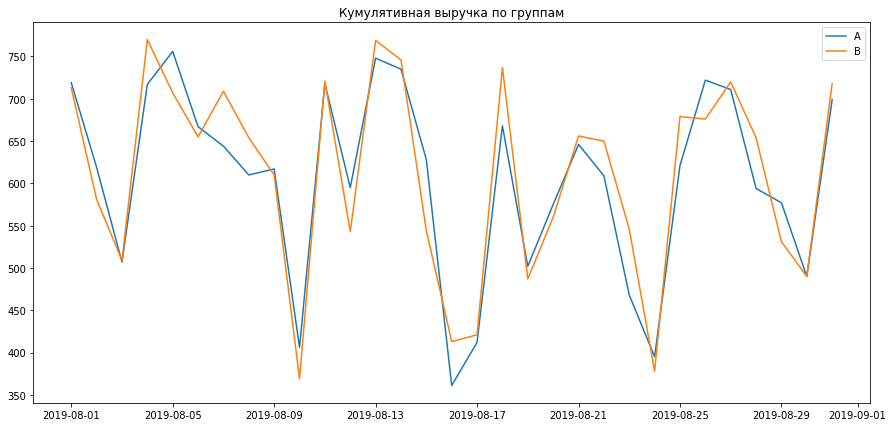

In [99]:
groupA_visits = visitors[visitors['group'] == 'A']
groupB_visits = visitors[visitors['group'] == 'B']

plt.figure(figsize=(15,7));
plt.ticklabel_format(style='plain')
plt.plot(groupA_visits['date'], groupA_visits['visitors'], label='A')
plt.plot(groupB_visits['date'], groupB_visits['visitors'], label='B')

plt.title('Динамика посетителей по дням по группам');

plt.legend();

Интересно, что в динамике посетителей есть некоторая закономерность: резкие подъёмы сменяются резкими падениями почти в два раза, а затем цикл повторяется. Однако цикл характерен для обеих групп, поэтому на результаты А/В-тестирования это повлиять не должно. Изучить причины этого явления можно в отдельном исследовании.

### Анализ A/B теста

Подготовим переменные для анализа

In [17]:
#создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates() 

In [18]:
#агрегируем значения по заказам
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'transactionId' : 'nunique', 'visitorId' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group']) 

In [19]:
#агрегируем значения по посетителям
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group']) 

In [20]:
datesGroups = orders[['date','group']].drop_duplicates()

cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

cumulativeData.head()

date group  orders  buyers  revenue  visitors
0 2019-08-01     A      24      20   148579       719
1 2019-08-01     B      21      20   101217       713
2 2019-08-02     A      44      38   242401      1338
3 2019-08-02     B      45      43   266748      1294
4 2019-08-03     A      68      62   354874      1845

In [106]:
#проверим получившийся датафрейм
if orders['date'].min() == cumulativeData['date'].min() and orders['date'].max() == cumulativeData['date'].max():
    print('Даты в оригинальном и агригированном датафреймах совпадают')
else:
        'Даты не совпадают'
        
if

Даты в оригинальном и агригированном датафреймах совпадают


#### Кумулятивная выручка по группам

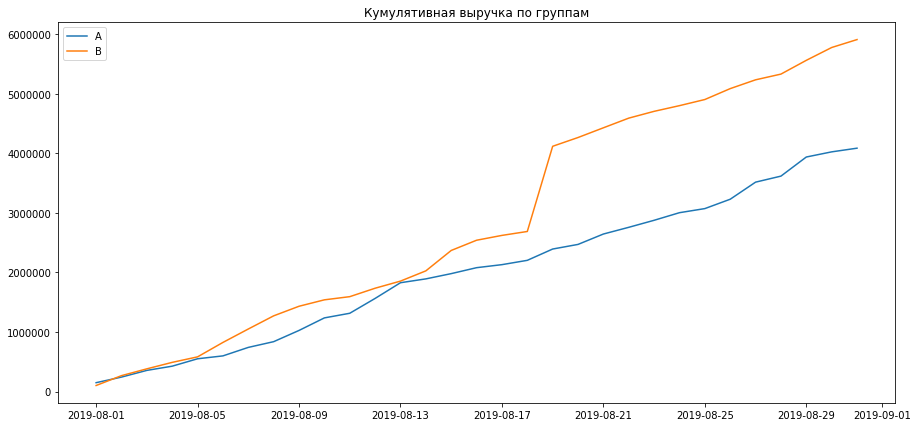

In [21]:
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

plt.figure(figsize=(15,7));
plt.ticklabel_format(style='plain')
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.title('Кумулятивная выручка по группам');

plt.legend();

Обе группы демонстрируют почти равномерный рост выручки. На графике заметен резкий скачок выручки группы В после 17.08. Этот скачок может быть связан с аномально большим количеством заказов или с очень дорогими заказами. После этого график выравнивается. В дальнейшем необходимо разобраться, в чём причина такого резкого скачка.

#### Кумулятивный средний чек по группам

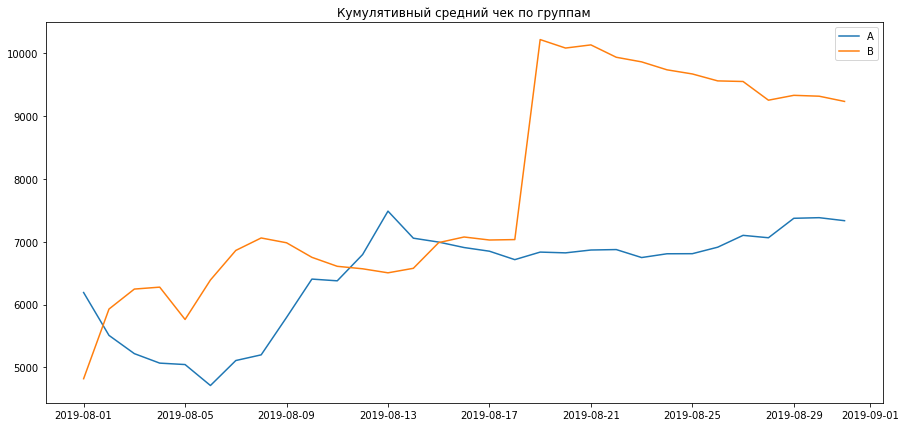

In [22]:
plt.figure(figsize=(15,7));
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend();
plt.title('Кумулятивный средний чек по группам');

Заметны сильные колебания среднего чека в обеих группах. Средний чек группы А стабиилизировался после 13.08.2019. Средний чек группы В показал резкий скачок моел 17.08, после чего показал незначительный спад, но всё же укрепился на уровне от 9 тыс. до 10 тыс. Необходимо изучить аномалии данных, чтобы понять, не повлияли ли выбросы на показатели.

#### Относительное изменение кумулятивного среднего чека группы B к группе A

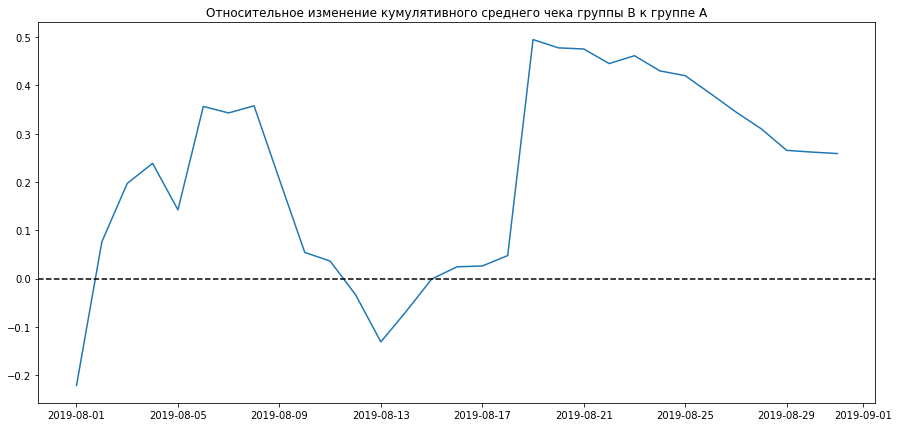

In [23]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(15,7));
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

plt.axhline(y=0, color='black', linestyle='--');
plt.title('Относительное изменение кумулятивного среднего чека группы B к группе A');

Есть резкие спады и подъёмы. На это могли повлиять выбросы в данных. До проверки данных на предмет аномалий можно сказать, что группа В демонстриурет хорошие показатели: средний чек почти всегда выше среднего чека группы А.

#### Кумулятивное среднее количеств заказов на посетителя по группам

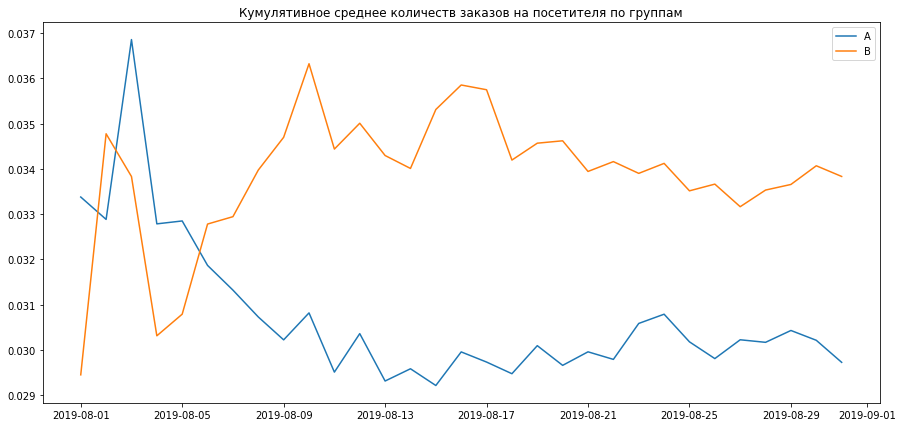

In [24]:
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

plt.figure(figsize=(15,7));

plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend();
plt.title('Кумулятивное среднее количеств заказов на посетителя по группам');

До 11.09.2019 в данных обеих группах были большие колебания. Более менее данные стабилизировались после этой даты. При этом группа В демонстрирует лучший результат.

#### Относительное изменение кумулятивного среднего количества заказов на посетителя группы B к группе A

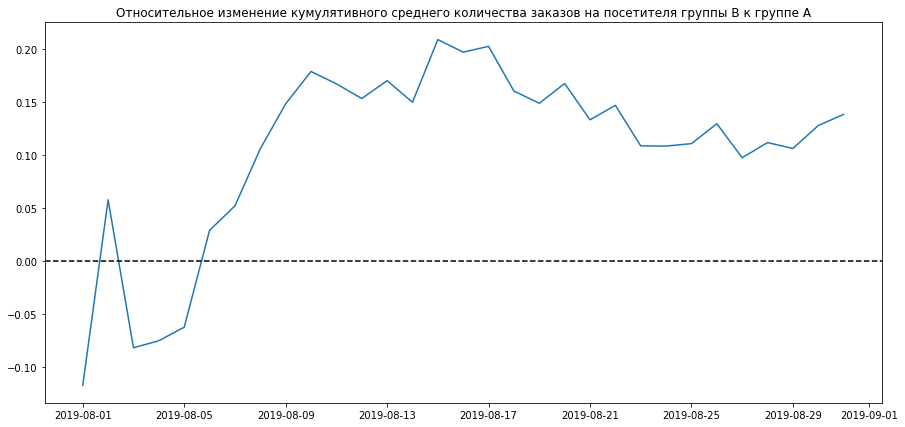

In [25]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(15,7));
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост кумулятивного среднего количества заказов на посетителя группы B относительно группы A")
plt.title('Относительное изменение кумулятивного среднего количества заказов на посетителя группы B к группе A');
plt.axhline(y=0, color='black', linestyle='--');


В начале наблюдаемого периода заметно, что показатели группы В имели скачкообразный характер и были то хуже, то немного лучше показателей группы А. Однако потом средний чек группы В стабильно демонстрирует лучшие показатели среднего чека группы А. Необходимо удостовериться, что эти показатели не искажены аномалиями в данных.

#### Точечный график количества заказов по пользователям

Посчитаем количество заказов по пользователям

In [26]:
orders.head()

transactionId   visitorId       date  revenue group
0     3667963787  3312258926 2019-08-15     1650     B
1     2804400009  3642806036 2019-08-15      730     B
2     2961555356  4069496402 2019-08-15      400     A
3     3797467345  1196621759 2019-08-15     9759     B
4     2282983706  2322279887 2019-08-15     2308     B

In [27]:
ordersByUsers = (orders.groupby('visitorId', as_index=False).agg({'transactionId': 'nunique'}))
ordersByUsers.columns = ['visitorId', 'orders']

ordersByUsers.sort_values(by='orders', ascending=False).head(10)

visitorId  orders
1023  4256040402      11
591   2458001652      11
569   2378935119       9
487   2038680547       8
44     199603092       5
744   3062433592       5
55     237748145       5
917   3803269165       5
299   1230306981       5
897   3717692402       5

8, 9, 11 заказов - такое количество заказов может быть аномальным. Проверим, так ли это.

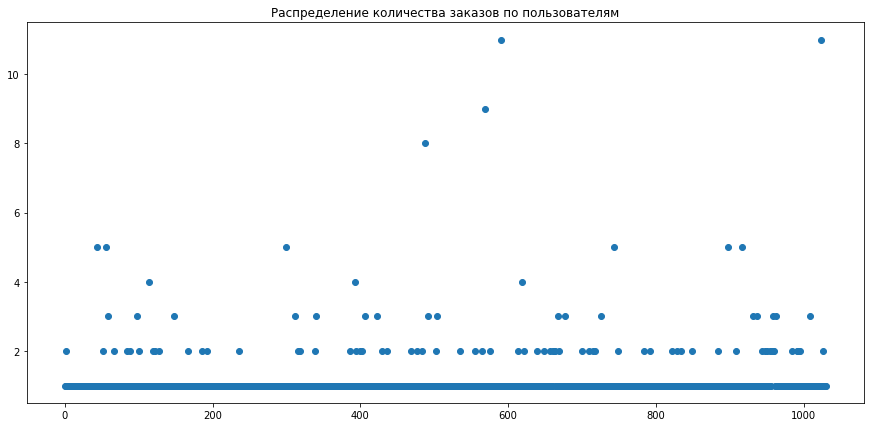

In [28]:
plt.figure(figsize=(15,7));
x_values = pd.Series(range(0,len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['orders']) 
plt.title('Распределение количества заказов по пользователям');

Из графика видно, что большинство пользователей совершает 1 заказ. Даже 2 заказа совершает небольшое количество пользователей. А больше двух заказов совсем редки.

#### 95-й и 99-й перцентили количества заказов на пользователя. Граница для определения аномальных пользователей

In [29]:
np.percentile(ordersByUsers['orders'], [95, 99])

array([2., 4.])

95% пользователей совершают 2 заказа. 99% - не более 4. Будем считать аномальными тех пользователей, которые совершили более четырёх заказов.

#### Точечный график стоимостей заказов

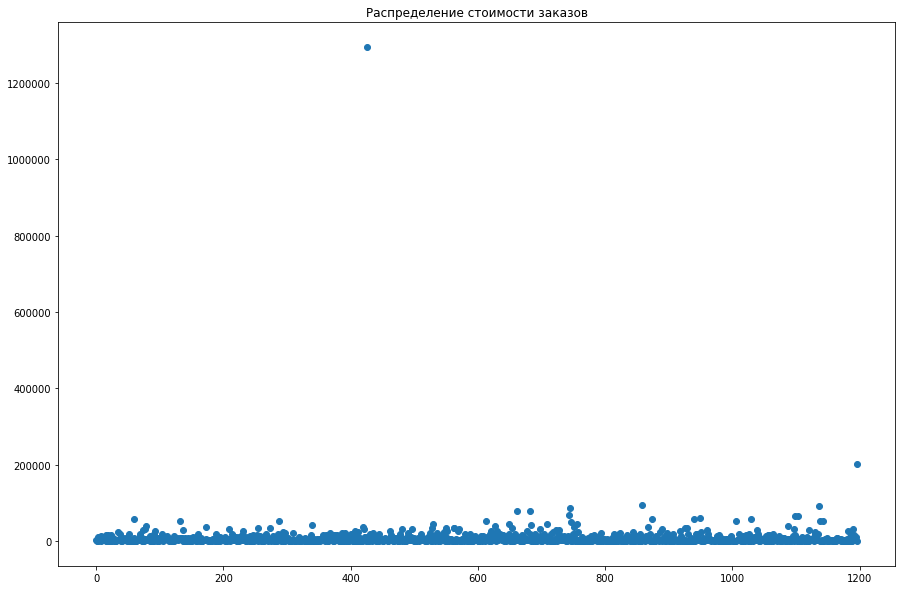

In [30]:
plt.figure(figsize=(15,10));
plt.ticklabel_format(style='plain');
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue']);
plt.title('Распределение стоимости заказов');

Из графика видно, что стоимость заказа, выше 100 тыс. - большая редкость. Узнаем, какова сумма для большинства заказов.

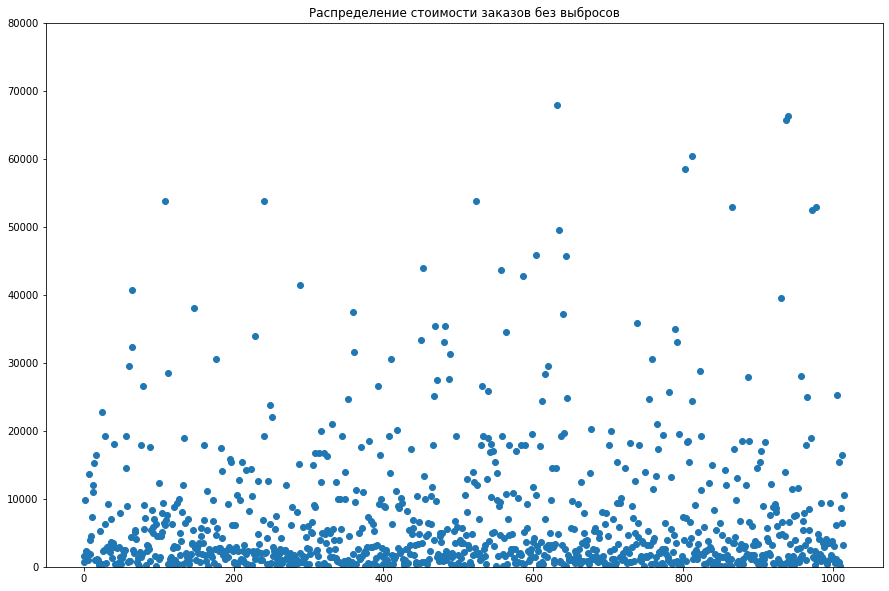

In [113]:
plt.figure(figsize=(15,10));
plt.ticklabel_format(style='plain');
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.ylim(0, 80000);
plt.scatter(x_values, orders['revenue']);
plt.title('Распределение стоимости заказов без выбросов');

Из графика с более крупным масштабом видно, что основная масса заказов лежит в пределах 30 тыс.

#### 95-й и 99-й перцентили стоимости заказов. Граница для определения аномальных заказов.

In [31]:
np.percentile(orders['revenue'], [95, 99])

array([28000. , 58233.2])

95% заказов не превышают сумму 28 тыс. 99% заказов были не более чем на 58 тыс. Определим заказы дороже 28 тыс. как аномальные.

#### Расчёт статистической значимости различий в среднем количестве заказов на посетителя между группами по «сырым» данным

Подготовим данные для расчёта.

In [32]:
#данные по посетителям по группам
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']]\
.agg({'date': 'max', 'visitorsPerDateA': 'sum'}),axis=1,)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']]\
.agg({'date': 'max', 'visitorsPerDateB': 'sum'}),axis=1,)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

In [33]:
#данные по заказам по группам
ordersADaily = (orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']].groupby('date', as_index=False)\
.agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'}))
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(lambda x: ordersADaily[ordersADaily['date'] <= x['date']]\
.agg({'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}), axis=1).sort_values(by=['date'])

ordersACummulative.columns = ['date','ordersCummulativeA','revenueCummulativeA']

ordersBDaily = (orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']].groupby('date', as_index=False)\
.agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'}))
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']]\
.agg({'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}),axis=1).sort_values(by=['date'])

ordersBCummulative.columns = ['date','ordersCummulativeB','revenueCummulativeB']

In [34]:
#объединим данные
data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)
data.head()

date  ordersPerDateA  revenuePerDateA  ordersPerDateB  \
0 2019-08-01              24           148579              21   
1 2019-08-02              20            93822              24   
2 2019-08-03              24           112473              16   
3 2019-08-04              16            70825              17   
4 2019-08-05              25           124218              23   

   revenuePerDateB  ordersCummulativeA  revenueCummulativeA  \
0           101217                  24               148579   
1           165531                  44               242401   
2           114248                  68               354874   
3           108571                  84               425699   
4            92428                 109               549917   

   ordersCummulativeB  revenueCummulativeB  visitorsPerDateA  \
0                  21               101217               719   
1                  45               266748               619   
2                  61               380996               507   
3                  78               489567               717   
4                 101               581995               756   

   visitorsPerDateB  visitorsCummulativeA  visitorsCummulativeB  
0               713                   719                   713  
1               581                  1338                  1294  
2               509                  1845                  1803  
3               770                  2562                  2573  
4               707                  3318                  3280

In [35]:
#создадим переменные, где для пользователей будет указано количество совершённых заказов
ordersByUsersA = (orders[orders['group'] == 'A'].groupby('visitorId', as_index=False).agg({'transactionId': pd.Series.nunique}))
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (orders[orders['group'] == 'B'].groupby('visitorId', as_index=False).agg({'transactionId': pd.Series.nunique}))
ordersByUsersB.columns = ['userId', 'orders'] 

sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0) 

Проверим следующие гипотезы:

H0:Среднее количество заказов одного покупателя групп A и B равны, статистически значимых различий нет.

H1:Среднем количество заказов на посетителя групп A и B различны, статистически значимые различия есть.

In [36]:
#рассчитаем статистическую значимость различий данных
print('P-value с поправкой:', "{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print('Относительное изменение группы В:', "{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

P-value с поправкой: 0.017
Относительное изменение группы В: 0.138


P-value с поправкой - 0.017 - меньше 0.05. Значит, гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет, есть основания отвергунть.

То есть по "сырым" данным, в среднем количестве заказов между группами есть статистически значимые различия.

Это подтверждается и расчётом относительного прироста среднего числа заказов группы B относительно группы А - 13,8%. 

#### Расчёт статистической значимости различий в среднем чеке заказа между группами по «сырым» данным

Проверим следующие гипотезы:

H0:Средние чеки групп A и B равны, статистически значимых различий нет.

H1:Средние чеки групп A и B различны, статистически значимые различия есть.

In [37]:
print('P-value с поправкой:', '{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('Относительное изменение группы В:','{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

P-value с поправкой: 0.729
Относительное изменение группы В: 0.259


P-value с поправкой - 0,729 - больше 0.05. Следовательно, гипотезу о том, что статистически значимых различий в среднем чеке между группами нет, отвергнуть нельзя.
Однако, разница между чеками группы А и В почти 26% - достаточно большое отличие. 

Учитывая то, что рассчёты говорят, о том, что значимых различий в данных нет, и при этом между чеками групп разница 26%, можно сделать вывод, что такие данные являются аномальными и были получены случайно.

#### Расчёт статистической значимости различий в среднем количестве заказов на посетителя между группами по «очищенным» данным

In [127]:
#подготовим данные об аномальных пользователях
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > int(np.percentile(ordersByUsers['orders'], [99]))]['userId'],ordersByUsersB[ordersByUsersB['orders'] > 4]\
['userId'],],axis=0,)
usersWithExpensiveOrders = orders[orders['revenue'] > int(np.percentile(orders['revenue'], [95]))]['visitorId']
abnormalUsers = (pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0).drop_duplicates().sort_values())
print('Всего', abnormalUsers.shape[0], ' аномальных пользователей.')

Всего 55  аномальных пользователей.


In [39]:
#подготовим переменные с количеством заказов по пользователям
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))]\
['orders'],pd.Series(0,index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])),name='orders')],axis=0)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))]\
['orders'],pd.Series(0,index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])),name='orders')],axis=0)

Проверим следующие гипотезы:

H0:Среднее количество заказов одного покупателя групп A и B равны, статистически значимых различий нет.

H1:Среднем количество заказов на посетителя групп A и B различны, статистически значимые различия есть.

In [40]:
print('P-value с поправкой:', '{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('Относительное изменение группы В:', '{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

P-value с поправкой: 0.018
Относительное изменение группы В: 0.145


Результаты в целом похожи на результаты "сырых" данных: есть основания отвергнуть гипотезу о том, что различий нет. Изменение количества заказов группы В немного выросло - 14,9%.

#### Расчёт статистической значимости различий в среднем чеке заказа между группами по «очищенным» данным

Проверим следующие гипотезы:

H0:Средние чеки групп A и B равны, статистически значимых различий нет.

H1:Средние чеки групп A и B различны, статистически значимые различия есть.

In [41]:
print('P-value:',
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print('Относительные различия:',
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
) 

P-value: 0.961
Относительные различия: -0.014


P-value гораздо выше 0,05, поэтому гипотезу о том, что различий нет, нет оснований отвергнуть. Прирост группы В относительно группы А же изменился очень сильно: средний чек, без учёта аномальных данных, даже немного упал. Однако, всего на 1.4%, что не существенно.

### Выводы

Можно сделать следующие выводы о результатах тестирования.

1. Выручка растёт равномерно и постоянно в обеих группах. Группа В демонстрирует показатели лучше группы А.
2. Средний чек меняется неравномерно, но в целом наблюдается рост. Группа В также обгоняет группу А.
3. Относительное изменение среднего чека группы В относительно группы А демонстрирует резкие спады и подъёмы. На это могли повлиять выбросы в данных. Необходимо проверить данные на наличие аномалий.

Для "чистки" данных от аномальных пользователей были рассчитаны пороги с помощью процентилей: в количестве заказов и среднем чеке были взяты максимальные числа, характерные для 95% всех пользователей. Максимальное число заказов в таком случае -4, а максимальный средний чек - 28 тыс.

При расчёте статистической значимости различий между группами было выявлено следующее:

1. Среднее число заказов по "сырым" данным: можно сделать вывод, что различия между группами есть. Относительный прирост группы В - 13,8%. По "очищенным" данным: результаты в целом похожи на результаты "сырых" данных: есть основания отвергнуть гипотезу о том, что различий нет. Изменение количества заказов группы В немного выросло - 14,9%.

2. Средний чек по "сырым" данным: рассчёты показывают, что статистически значимых различий в среднем чеке между группами нет. Даже несмотря на большую разницу в среднем чеке - 26%. На это могли повлиять выбросы в данных. И правда, после чистки данных оказалось, что средний чек группы В меньше группы А всего на 1,4%.

Итого:

1. Есть статистически значимое различие по среднему количеству заказов между группами и по «сырым», и по данным после фильтрации аномалий. Количество заказов участников группы В выросло почти на 15%.
2. Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий.
3. Графики изменений количества заказов и среднего чека группы В показывают, что группа В по показателям превосходит группу А.

А/В тестирование показало, что группа В положительно отреагировала на изменения: количество заказов выросло. Средний чек практически не изменился. Выручка растёт в группе В быстрее, чем в группе А.

Можно остановить тест и зафиксировать победу группы В.